<a href="https://colab.research.google.com/github/AboudOnji/Algorithms/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is to improve genetic algorithm to optimizae "Akley" function.
Prof. DSC. BARSEKH-ONJI Aboud
ORCID:_

Iniciando Algoritmo Genético...
Dimensiones: 2, Población: 100, Generaciones: 200
------------------------------
Generación 10/200 - Mejor Fitness: 0.020458
Generación 20/200 - Mejor Fitness: 0.000120
Generación 30/200 - Mejor Fitness: 0.000002
Generación 40/200 - Mejor Fitness: 0.000000
Generación 50/200 - Mejor Fitness: 0.000000
Generación 60/200 - Mejor Fitness: 0.000000
Generación 70/200 - Mejor Fitness: 0.000000
Generación 80/200 - Mejor Fitness: 0.000000
Generación 90/200 - Mejor Fitness: 0.000000
Generación 100/200 - Mejor Fitness: 0.000000
Generación 110/200 - Mejor Fitness: 0.000000
Generación 120/200 - Mejor Fitness: 0.000000
Generación 130/200 - Mejor Fitness: 0.000000
Generación 140/200 - Mejor Fitness: 0.000000
Generación 150/200 - Mejor Fitness: 0.000000
Generación 160/200 - Mejor Fitness: 0.000000
Generación 170/200 - Mejor Fitness: 0.000000
Generación 180/200 - Mejor Fitness: 0.000000
Generación 190/200 - Mejor Fitness: 0.000000
Generación 200/200 - Mejor Fitness: 0.000

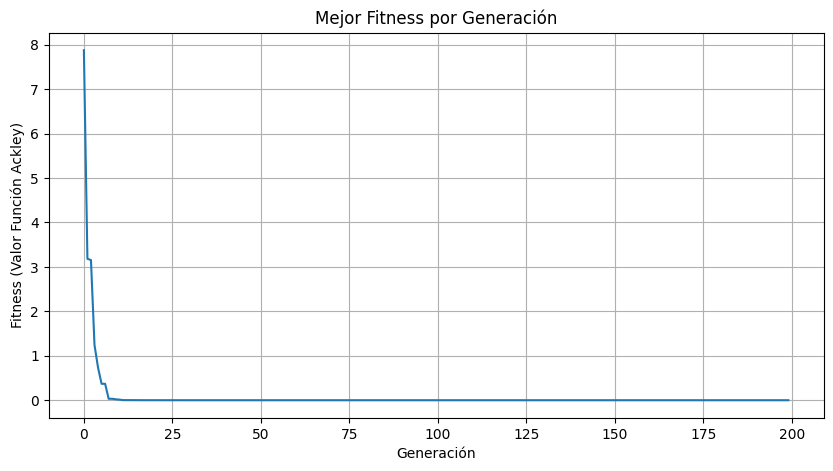

In [1]:

# -*- coding: utf-8 -*-
"""
Algoritmo Genético para minimizar la función Ackley en Google Colab.
"""

import numpy as np
import math
import random
import matplotlib.pyplot as plt

# --- Parámetros de la Función Ackley ---
# Valores estándar
A = 20
B = 0.2
C = 2 * math.pi

# --- Parámetros del Algoritmo Genético ---
DIMENSIONES = 2  # Número de variables de la función (ej. x1, x2)
LIMITES_BUSQUEDA = [-32.768, 32.768] # Límites para cada variable
TAMANO_POBLACION = 100
PROBABILIDAD_CRUCE = 0.8
PROBABILIDAD_MUTACION = 0.1 # Probabilidad por gen
DESVIACION_MUTACION = 0.5 # Desviación estándar para la mutación Gaussiana
NUM_GENERACIONES = 200
TAMANO_TORNEO = 3 # Número de individuos en cada torneo de selección
ELITISMO = True # Mantener al mejor individuo de la generación anterior

# --- Función Ackley ---
# Objetivo: Minimizar esta función (el mínimo global es 0 en [0, 0, ..., 0])
def ackley(x):
    """Calcula el valor de la función Ackley para un vector x."""
    d = len(x) # Dimensiones
    sum_sq_term = -B * np.sqrt(np.sum(x**2) / d)
    sum_cos_term = np.sum(np.cos(C * x)) / d
    result = -A * np.exp(sum_sq_term) - np.exp(sum_cos_term) + A + np.exp(1)
    return result

# --- Funciones del Algoritmo Genético ---

def inicializar_poblacion(tamano, dimensiones, limites):
    """Crea la población inicial de individuos aleatorios."""
    poblacion = np.random.uniform(limites[0], limites[1], (tamano, dimensiones))
    return poblacion

def calcular_fitness(poblacion):
    """Calcula el fitness de cada individuo (valor de la función Ackley)."""
    # Menor valor de Ackley es mejor fitness
    return np.array([ackley(individuo) for individuo in poblacion])

def seleccion_torneo(poblacion, fitness, tamano_torneo):
    """Selecciona un padre usando selección por torneo."""
    seleccionados = np.random.choice(len(poblacion), tamano_torneo, replace=False)
    indices_fitness = fitness[seleccionados].argsort() # Ordena por fitness (menor es mejor)
    mejor_indice_local = seleccionados[indices_fitness[0]]
    return poblacion[mejor_indice_local]

def cruce_blx_alpha(padre1, padre2, alpha=0.5):
    """Realiza el cruce BLX-alpha entre dos padres."""
    hijo = np.zeros_like(padre1)
    for i in range(len(padre1)):
        d = abs(padre1[i] - padre2[i])
        min_val = min(padre1[i], padre2[i]) - alpha * d
        max_val = max(padre1[i], padre2[i]) + alpha * d
        hijo[i] = random.uniform(min_val, max_val)
        # Asegurar que el hijo esté dentro de los límites de búsqueda
        hijo[i] = np.clip(hijo[i], LIMITES_BUSQUEDA[0], LIMITES_BUSQUEDA[1])
    return hijo

def mutacion_gaussiana(individuo, prob_mutacion, limites, desviacion):
    """Aplica mutación Gaussiana a un individuo."""
    individuo_mutado = individuo.copy()
    for i in range(len(individuo)):
        if random.random() < prob_mutacion:
            mutacion = random.gauss(0, desviacion)
            individuo_mutado[i] += mutacion
            # Asegurar que el gen mutado esté dentro de los límites
            individuo_mutado[i] = np.clip(individuo_mutado[i], limites[0], limites[1])
    return individuo_mutado

# --- Algoritmo Genético Principal ---

def algoritmo_genetico():
    """Ejecuta el algoritmo genético completo."""
    # Inicialización
    poblacion = inicializar_poblacion(TAMANO_POBLACION, DIMENSIONES, LIMITES_BUSQUEDA)
    historial_mejor_fitness = []

    print("Iniciando Algoritmo Genético...")
    print(f"Dimensiones: {DIMENSIONES}, Población: {TAMANO_POBLACION}, Generaciones: {NUM_GENERACIONES}")
    print("-" * 30)

    for generacion in range(NUM_GENERACIONES):
        # Evaluación
        fitness = calcular_fitness(poblacion)
        mejor_fitness_generacion = np.min(fitness)
        indice_mejor = np.argmin(fitness)
        mejor_individuo_generacion = poblacion[indice_mejor]
        historial_mejor_fitness.append(mejor_fitness_generacion)

        if (generacion + 1) % 10 == 0: # Imprimir progreso cada 10 generaciones
             print(f"Generación {generacion + 1}/{NUM_GENERACIONES} - Mejor Fitness: {mejor_fitness_generacion:.6f}")
             # print(f"  Mejor Individuo: {mejor_individuo_generacion}") # Descomentar si quieres ver el individuo

        # Selección y Reproducción
        nueva_poblacion = []

        # Elitismo: Conservar al mejor individuo si está activado
        if ELITISMO:
            nueva_poblacion.append(mejor_individuo_generacion)

        # Crear el resto de la nueva población
        while len(nueva_poblacion) < TAMANO_POBLACION:
            # Selección
            padre1 = seleccion_torneo(poblacion, fitness, TAMANO_TORNEO)
            padre2 = seleccion_torneo(poblacion, fitness, TAMANO_TORNEO)

            # Cruce
            if random.random() < PROBABILIDAD_CRUCE:
                hijo1 = cruce_blx_alpha(padre1, padre2)
                hijo2 = cruce_blx_alpha(padre2, padre1) # Podría ser el mismo método o diferente
            else:
                hijo1, hijo2 = padre1.copy(), padre2.copy() # Si no hay cruce, los hijos son clones

            # Mutación
            hijo1 = mutacion_gaussiana(hijo1, PROBABILIDAD_MUTACION, LIMITES_BUSQUEDA, DESVIACION_MUTACION)
            hijo2 = mutacion_gaussiana(hijo2, PROBABILIDAD_MUTACION, LIMITES_BUSQUEDA, DESVIACION_MUTACION)

            nueva_poblacion.append(hijo1)
            if len(nueva_poblacion) < TAMANO_POBLACION:
                nueva_poblacion.append(hijo2)

        poblacion = np.array(nueva_poblacion)

    # Fin del algoritmo
    print("-" * 30)
    print("Optimización Finalizada.")
    fitness_final = calcular_fitness(poblacion)
    mejor_fitness_final = np.min(fitness_final)
    indice_mejor_final = np.argmin(fitness_final)
    mejor_individuo_final = poblacion[indice_mejor_final]

    print(f"Mejor Fitness encontrado: {mejor_fitness_final:.6f}")
    print(f"Mejor Solución encontrada (x): {mejor_individuo_final}")

    # Graficar historial de fitness
    plt.figure(figsize=(10, 5))
    plt.plot(range(NUM_GENERACIONES), historial_mejor_fitness)
    plt.title('Mejor Fitness por Generación')
    plt.xlabel('Generación')
    plt.ylabel('Fitness (Valor Función Ackley)')
    plt.grid(True)
    plt.show()

    return mejor_individuo_final, mejor_fitness_final

# --- Ejecutar el Algoritmo ---
if __name__ == "__main__":
    mejor_solucion, mejor_valor = algoritmo_genetico()

